In [2]:
import numpy as np #numpy
import pandas as pd
import matplotlib.pyplot as plt  #matplotlib
import matplotlib.gridspec as gridspec
from matplotlib import colors
from matplotlib.colors import LogNorm
from matplotlib import patches
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import NullFormatter

import astropy.table  #astropy
from astropy.table import Table, Column, MaskedColumn 
from astropy.visualization import astropy_mpl_style
from scipy.stats import gaussian_kde  #scipy: science python
import seaborn as sns  #seaborn: data visualization
import os.path

from time import time
from sklearn import manifold, datasets

import umap  #UMAP
from sklearn.decomposition import PCA  #PCA
from sklearn.manifold import TSNE  #t-SNE
from itertools import product
import pickle
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

# Importem la taula

In [3]:
miglio2021 = Table.read("../data/Miglio2021_X_APOGEE_DR17.fits")
names = [name for name in miglio2021.colnames if len(miglio2021[name].shape) <= 1]
miglio2021.keep_columns(names)
mig = miglio2021.to_pandas()
mig.head()

,APOGEE,KIC,Jmag,Hmag,Ksmag,RAdeg,DEdeg,__Fe_H_,__alpha_M_,Age,...,NI_FE_ERR,NI_FE_FLAG,CU_FE,CU_FE_SPEC,CU_FE_ERR,CU_FE_FLAG,CE_FE,CE_FE_SPEC,CE_FE_ERR,CE_FE_FLAG
0,b'2M19222920+3710285',1569842,9.589,9.074,8.989,290.6217,37.174599,-0.24,0.12,9.8,...,0.012334,0,NaN,NaN,0.005112,2,0.096240,0.151900,0.069591,0
1,b'2M19300513+3717470',1726291,11.206,10.679,10.547,292.5214,37.296398,-0.34,0.19,10.1,...,0.015864,0,NaN,NaN,0.009413,2,-0.318970,-0.263310,0.085400,0
2,b'2M19045380+3741230',2283721,11.266,10.709,10.590,286.2242,37.689701,-0.19,0.11,9.4,...,0.014437,0,NaN,NaN,NaN,259,0.116419,0.172079,0.077468,0
3,b'2M19060736+3740100',2284679,9.923,9.456,9.335,286.5307,37.669399,-0.45,0.21,11.2,...,0.014171,0,NaN,NaN,0.010622,2,-0.313170,-0.257510,0.076819,0
4,b'2M19280882+3736381',2305590,9.829,9.235,9.128,292.0368,37.610600,-0.30,0.24,10.2,...,0.018914,0,NaN,NaN,0.009991,258,0.581840,0.637500,0.082008,0


In [4]:
#Mirem els noms de totes les columnes
print('Number of rows: ' +str(len(mig)))
print('\n Names of the columns:\n')
for column in mig.columns:
    print(column)

Number of rows: 3315

 Names of the columns:

APOGEE
KIC
Jmag
Hmag
Ksmag
RAdeg
DEdeg
__Fe_H_
__alpha_M_
Age
b_Age
b_age_lc
Mass
b_Mass
b_mass_lc
Rad
b_Rad
b_rad_lc
Dist
b_Dist
b_dist_lc
Av
b_Av
b_av_lc
evstate
zmax
e_zmax
Ecc
e_Ecc
Rperi
e_Rperi
Rap
e_Rap
GalR
Galphi
GalZ
vR
vT
vZ
_RA
_DE
APOGEE_ID
TELESCOPE
FIELD
ALT_ID
RA
DEC
GLON
GLAT
J
J_ERR
H
H_ERR
K
K_ERR
AK_TARG
AK_TARG_METHOD
AK_WISE
SFD_EBV
APOGEE_TARGET1
APOGEE_TARGET2
APOGEE2_TARGET1
APOGEE2_TARGET2
APOGEE2_TARGET3
APOGEE2_TARGET4
TARGFLAGS
SURVEY
PROGRAMNAME
NVISITS
SNR
SNREV
STARFLAG
STARFLAGS
ANDFLAG
ANDFLAGS
VHELIO_AVG
VSCATTER
VERR
RV_TEFF
RV_LOGG
RV_FEH
RV_ALPHA
RV_CARB
RV_CHI2
RV_CCFWHM
RV_AUTOFWHM
RV_FLAG
N_COMPONENTS
MEANFIB
SIGFIB
MIN_H
MAX_H
MIN_JK
MAX_JK
GAIAEDR3_SOURCE_ID
GAIAEDR3_PARALLAX
GAIAEDR3_PARALLAX_ERROR
GAIAEDR3_PMRA
GAIAEDR3_PMRA_ERROR
GAIAEDR3_PMDEC
GAIAEDR3_PMDEC_ERROR
GAIAEDR3_PHOT_G_MEAN_MAG
GAIAEDR3_PHOT_BP_MEAN_MAG
GAIAEDR3_PHOT_RP_MEAN_MAG
GAIAEDR3_DR2_RADIAL_VELOCITY
GAIAEDR3_DR2_RADIAL_VELOCI

In [5]:
mig['evstate']

0       1
1       1
2       1
3       1
4       1
       ..
3310    2
3311    1
3312    1
3313    1
3314    2
Name: evstate, Length: 3315, dtype: int32

In [6]:
mig.head()

,APOGEE,KIC,Jmag,Hmag,Ksmag,RAdeg,DEdeg,__Fe_H_,__alpha_M_,Age,...,NI_FE_ERR,NI_FE_FLAG,CU_FE,CU_FE_SPEC,CU_FE_ERR,CU_FE_FLAG,CE_FE,CE_FE_SPEC,CE_FE_ERR,CE_FE_FLAG
0,b'2M19222920+3710285',1569842,9.589,9.074,8.989,290.6217,37.174599,-0.24,0.12,9.8,...,0.012334,0,NaN,NaN,0.005112,2,0.096240,0.151900,0.069591,0
1,b'2M19300513+3717470',1726291,11.206,10.679,10.547,292.5214,37.296398,-0.34,0.19,10.1,...,0.015864,0,NaN,NaN,0.009413,2,-0.318970,-0.263310,0.085400,0
2,b'2M19045380+3741230',2283721,11.266,10.709,10.590,286.2242,37.689701,-0.19,0.11,9.4,...,0.014437,0,NaN,NaN,NaN,259,0.116419,0.172079,0.077468,0
3,b'2M19060736+3740100',2284679,9.923,9.456,9.335,286.5307,37.669399,-0.45,0.21,11.2,...,0.014171,0,NaN,NaN,0.010622,2,-0.313170,-0.257510,0.076819,0
4,b'2M19280882+3736381',2305590,9.829,9.235,9.128,292.0368,37.610600,-0.30,0.24,10.2,...,0.018914,0,NaN,NaN,0.009991,258,0.581840,0.637500,0.082008,0


# Mirem quines dades tenen FLAGS

In [7]:
for columns in mig:
    if columns.endswith("_FLAG"):
        print(columns)
        print(mig[str(columns)].value_counts())
        print()

RV_FLAG
0     3314
32       1
Name: RV_FLAG, dtype: int64

C_FE_FLAG
0      3314
256       1
Name: C_FE_FLAG, dtype: int64

CI_FE_FLAG
0      3312
256       3
Name: CI_FE_FLAG, dtype: int64

N_FE_FLAG
0      3272
256      37
288       6
Name: N_FE_FLAG, dtype: int64

O_FE_FLAG
0    3315
Name: O_FE_FLAG, dtype: int64

NA_FE_FLAG
0      3311
256       3
1         1
Name: NA_FE_FLAG, dtype: int64

MG_FE_FLAG
0    3315
Name: MG_FE_FLAG, dtype: int64

AL_FE_FLAG
0    3315
Name: AL_FE_FLAG, dtype: int64

SI_FE_FLAG
0    3315
Name: SI_FE_FLAG, dtype: int64

P_FE_FLAG
2      3270
258      30
0         8
3         4
259       3
Name: P_FE_FLAG, dtype: int64

S_FE_FLAG
0      3314
256       1
Name: S_FE_FLAG, dtype: int64

K_FE_FLAG
0      3313
1         1
256       1
Name: K_FE_FLAG, dtype: int64

CA_FE_FLAG
0    3315
Name: CA_FE_FLAG, dtype: int64

TI_FE_FLAG
0    3315
Name: TI_FE_FLAG, dtype: int64

TIII_FE_FLAG
0      3307
257       4
256       3
1         1
Name: TIII_FE_FLAG, dtype: int64


# Data selection criteria

In [8]:
#mig = mig[mig['TEFF'] < 6200]
#mig = mig[(mig['LOGG'] < 4)&(mig['LOGG'] > 3.5)]
#mig = mig[mig['TEFF_ERR'] < 150]
mig = mig[(mig['RV_FLAG'] == 0)&(mig['C_FE_FLAG'] == 0)&(mig['CI_FE_FLAG'] == 0)&(mig['N_FE_FLAG'] == 0)&(mig['O_FE_FLAG'] == 0)&(mig['NA_FE_FLAG'] == 0)&
         (mig['S_FE_FLAG'] == 0)&(mig['TIII_FE_FLAG'] == 0)&(mig['V_FE_FLAG'] == 0)&(mig['CE_FE_FLAG'] == 0)]
mig = mig.drop(labels=['P_FE_FLAG','CU_FE_FLAG'], axis=1)

# Teff-logg diagram

Text(0.5, 1.0, 'LOGG(TEFF)')

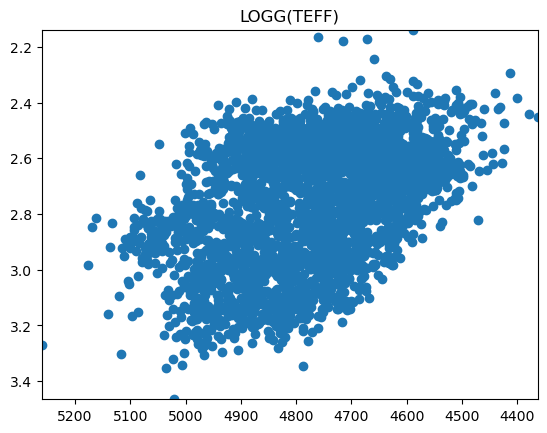

In [9]:
import numpy as np
import matplotlib.pyplot as plt
x = mig['TEFF']
y = mig['LOGG']
plt.scatter(x,y)
plt.xlim(max(x), min(x))
plt.ylim(max(y), min(y))
plt.title('LOGG(TEFF)')

Mirem la relacio entre [Fe/H] i the isocronic age

Text(0.5, 1.0, '[Fe/H](isocronic age)')

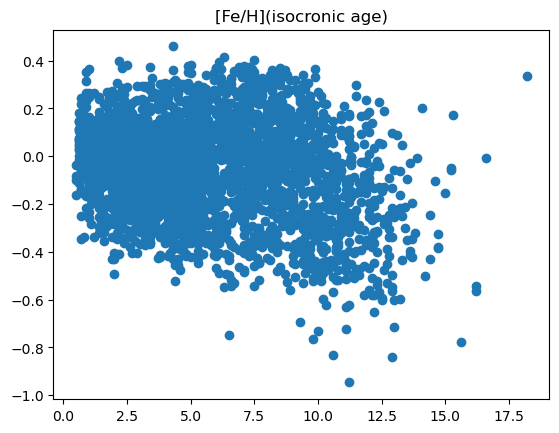

In [10]:
x = mig['Age']
y = mig['FE_H']
plt.scatter(x,y)
plt.title('[Fe/H](isocronic age)')

Sembla mes coherent

# Creacio del dataset

Primer nomes agafarem les columnes que estem interessats a utilitzar per a entrenar el model

Primer agafarem les metalicitats sense tenir en compte els flags

In [11]:
filtered_df = mig[['Age','TEFF','LOGG', 'C_FE', 'CI_FE', 'N_FE', 'O_FE', 'NA_FE', 'MG_FE', 'AL_FE', 'SI_FE', 'S_FE', 'K_FE', 'CA_FE',
                  'TI_FE', 'V_FE', 'CR_FE', 'MN_FE', 'FE_H', 'CO_FE', 'NI_FE', 'CE_FE' ]].copy()
filtered_df = filtered_df.dropna()
filtered_df = filtered_df.apply(pd.to_numeric, errors='coerce')

In [12]:
filtered_df.head()

,Age,TEFF,LOGG,C_FE,CI_FE,N_FE,O_FE,NA_FE,MG_FE,AL_FE,...,K_FE,CA_FE,TI_FE,V_FE,CR_FE,MN_FE,FE_H,CO_FE,NI_FE,CE_FE
0,9.8,4817.990723,3.083905,0.071996,0.076009,0.073346,0.196913,-0.129988,0.223263,0.188314,...,0.235769,0.094765,0.179623,-0.042288,0.026374,-0.101498,-0.29065,0.09864,0.107133,0.096240
1,10.1,4823.796387,3.109932,0.070293,0.194000,0.115990,0.314393,-0.352128,0.348673,0.259540,...,0.302629,0.190765,0.151823,0.250612,-0.085416,-0.122728,-0.38827,0.13715,0.110182,-0.318970
2,9.4,4748.026855,2.788529,0.065446,0.029532,0.086760,0.180403,0.009112,0.186943,0.195936,...,0.368155,0.109715,0.109363,-0.187218,-0.007106,-0.096728,-0.24318,0.11898,0.042022,0.116419
4,10.2,4605.007812,2.480893,0.166720,0.234920,0.034750,0.282853,0.043942,0.394983,0.272437,...,0.411468,0.190875,0.281993,-0.025298,0.037334,-0.137478,-0.40002,0.19849,0.095583,0.581840
5,10.0,4684.613281,2.848780,0.104613,0.138510,0.141330,0.223403,0.108262,0.297463,0.224611,...,0.378678,0.103955,0.120173,-0.176968,-0.035646,-0.106488,-0.23169,0.13391,0.124313,-0.100050


# XGBOOST

In [13]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

# Split dataframe into input and output columns
y = filtered_df['Age']
X = filtered_df.drop(columns = 'Age')

# Splitting into train and test
train_X, test_X, train_y, test_y = train_test_split(X, y,
                      test_size = 0.3, random_state = 123)
  
# Instantiation
model = xgb.XGBRegressor(objective ='reg:linear',
                  n_estimators = 10, seed = 123)
  
# Fitting the model
model.fit(train_X, train_y)

# Save the model
filename = 'defaultmodel'
pickle.dump(model, open(filename, 'wb'))

# load the model from disk (to get back the model in future...)
##loaded_model = pickle.load(open(filename, 'rb'))
  
# Predict the model
pred = model.predict(test_X)
  
# RMSE Computation
rmse = np.sqrt(MSE(test_y, pred))
print("RMSE : % f" %(rmse))

#Score
result = model.score(test_X, test_y)
print("Score: "+str(result))

[12:04:36] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1662013913324/work/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
RMSE :  1.336655
Score: 0.8217495156430924


# PLOT

r value 0.9078770332004
std_err 0.011892962687058636


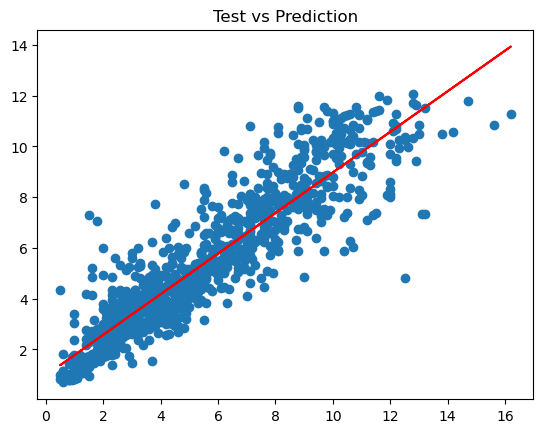

In [14]:
xp = test_y
yp = pred
from scipy.stats import linregress
slope, intercept, r, p, se = linregress(xp, yp)
plt.scatter(xp,yp)
yp_lin = slope*xp + intercept
plt.plot(xp, yp_lin, color = 'red')
plt.title('Test vs Prediction')
print('r value', r)
print('std_err',se)

# SHAP

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


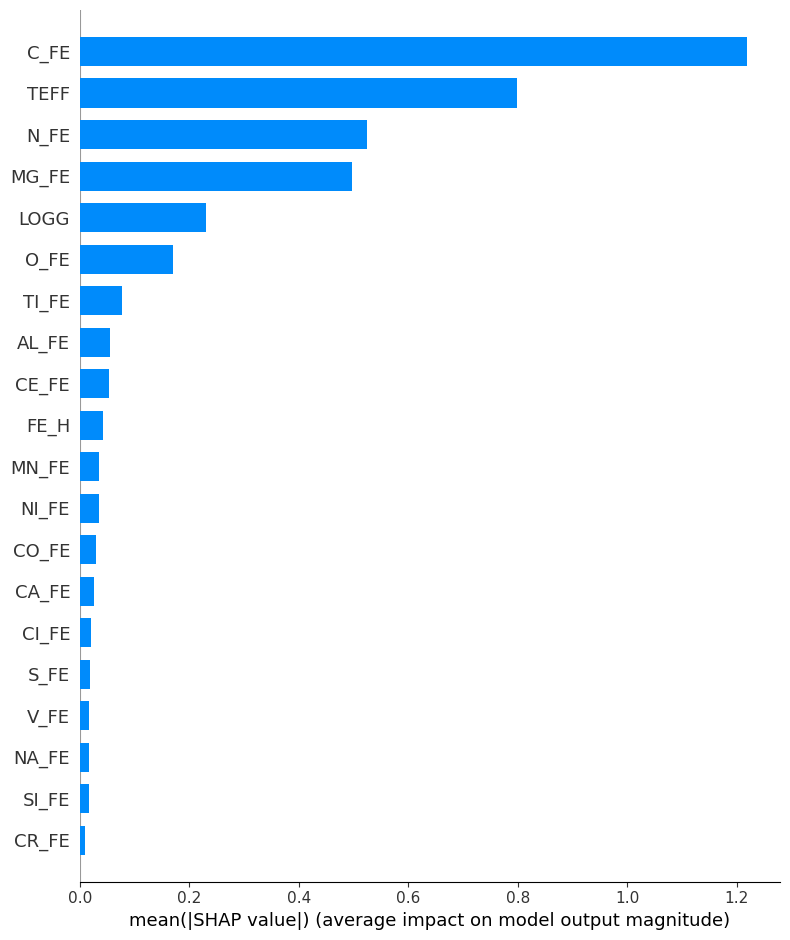

In [16]:
import shap
#test_X = test_X.values
# Fits the explainer
explainer = shap.Explainer(model)
# Calculates the SHAP values - It takes some time
shap_values = explainer(test_X)
shap.summary_plot(shap_values, test_X, plot_type="bar")

# XGBOOST WITH PERTURBED DATA

In [18]:
mig = mig.reset_index()
mig  = mig.drop(columns = 'index')
rmse_list = []
score_list = []
for ii in np.arange(10):
    # Run XGBoost with slightly perturbed input data
    #Hem de transformar els train sets
    C_FE_2 = []
    CI2 = []
    N2 = []
    O2 = []
    na2 = []
    mg2 = []
    ti2 = []
    for row in range(len(mig)):
        #C_FE
        err_C = mig['C_FE_ERR'][row]
        val_C = mig['C_FE'][row]
        C2 = float(val_C) + np.random.normal(0, float(err_C))
        C_FE_2.append(C2)
        #CI_FE
        err_CI = mig['CI_FE_ERR'][row]
        val_CI = mig['CI_FE'][row]
        CI2_v = float(val_CI) + np.random.normal(0, float(err_CI))
        CI2.append(CI2_v)
        #N_FE
        err_N = mig['N_FE_ERR'][row]
        val_N = mig['N_FE'][row]
        N_v = float(val_N) + np.random.normal(0, float(err_N))
        N2.append(N_v)
        #O_FE
        err_o = mig['O_FE_ERR'][row]
        val_o = mig['O_FE'][row]
        O_v = float(val_o) + np.random.normal(0, float(err_o))
        O2.append(O_v)
        #NA_FE
        err_na = mig['NA_FE_ERR'][row]
        val_na = mig['NA_FE'][row]
        na_v = float(val_na) + np.random.normal(0, float(err_na))
        na2.append(na_v)
        #MG_FE
        err_mg = mig['MG_FE_ERR'][row]
        val_mg = mig['MG_FE'][row]
        mg_v = float(val_mg) + np.random.normal(0, float(err_mg))
        mg2.append(mg_v)
        #TI_FE
        err_ti = mig['TI_FE_ERR'][row]
        val_ti = mig['TI_FE'][row]
        ti_v = float(val_ti) + np.random.normal(0,float(err_ti))
        ti2.append(ti_v)
    mig['C_FE_2'] = C_FE_2
    mig['CI_FE_2'] = CI2
    mig['N_FE_2'] = N2
    mig['O_FE_2']= O2
    mig['NA_FE_2']= na2
    mig['MG_FE_2'] = mg2
    mig['TI_FE_2'] = ti2
    filtered_df = mig[['Age','TEFF','LOGG', 'C_FE_2', 'CI_FE_2', 'N_FE_2', 'O_FE_2', 'NA_FE_2', 'MG_FE_2',
                  'TI_FE_2']].copy() #He de escollir una age, teff, logg amb error? Quin error fico?
    filtered_df = filtered_df.dropna()
    filtered_df = filtered_df.apply(pd.to_numeric, errors='coerce')
    # Split dataframe into input and output columns
    y = filtered_df['Age']
    X = filtered_df.drop(columns = 'Age')

    # Splitting into train and test
    train_X, test_X, train_y, test_y = train_test_split(X, y,
                      test_size = 0.3, random_state = 123)
  
    # Instantiation
    modeli = xgb.XGBRegressor(objective ='reg:squarederror',
                  n_estimators = 10, seed = 123) #Hem canviat per reg:linear a squared error per warning deprecation
  
    # Fitting the model
    modeli.fit(train_X, train_y)
    
    # Predict the model
    pred = modeli.predict(test_X)
  
    # RMSE Computation
    rmse = np.sqrt(MSE(test_y, pred))
    rmse_list.append(rmse)   

    #Score
    result = modeli.score(test_X, test_y)
    score_list.append(result)

df_results = pd.DataFrame({'RMSE': rmse_list, 'Score':score_list})
df_results

,RMSE,Score
0,1.400984,0.811596
1,1.413038,0.808339
2,1.422377,0.805798
3,1.416294,0.807455
4,1.407068,0.809956
5,1.465664,0.793798
6,1.399020,0.812123
7,1.440727,0.800755
8,1.432501,0.803023
9,1.400715,0.811668


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


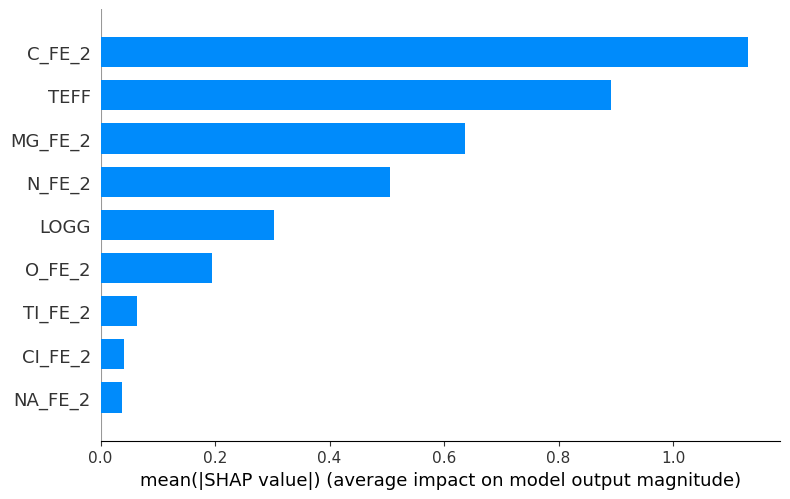

In [19]:
#Fem un shap values de la ultima iteracio per veure que tal
import shap
# Fits the explainer
explainer = shap.Explainer(modeli)
# Calculates the SHAP values - It takes some time
shap_values = explainer(test_X)
shap.summary_plot(shap_values, test_X, plot_type="bar")

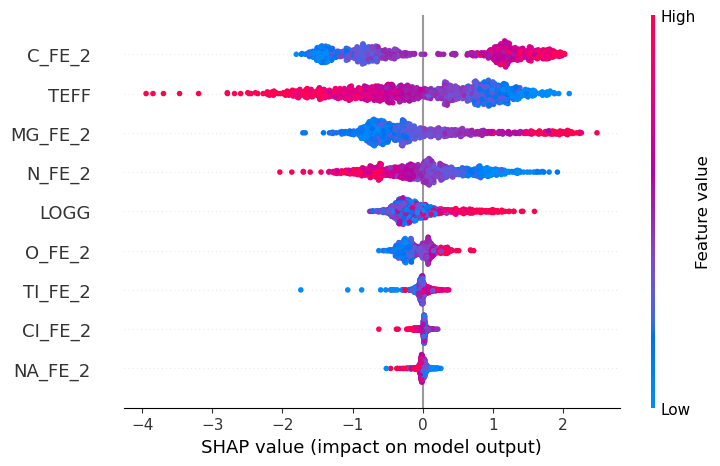

In [20]:
# Beeswarm plot
shap.plots.beeswarm(shap_values)

# IMPORTEM BIG TABLE

In [21]:
miglio2021 = Table.read("../data/allStarLite-dr17-synspec_rev1.fits")
names = [name for name in miglio2021.colnames if len(miglio2021[name].shape) <= 1]
miglio2021.keep_columns(names)
big = miglio2021.to_pandas()
big.head()

,APOGEE_ID,TELESCOPE,FIELD,ALT_ID,RA,DEC,GLON,GLAT,J,J_ERR,...,NI_FE_ERR,NI_FE_FLAG,CU_FE,CU_FE_SPEC,CU_FE_ERR,CU_FE_FLAG,CE_FE,CE_FE_SPEC,CE_FE_ERR,CE_FE_FLAG
0,b'VESTA',b'apo1m',b'calibration',b' ',NaN,NaN,292.219131,-30.602919,99.999001,0.000,...,0.010266,0,NaN,NaN,0.059403,2,NaN,NaN,NaN,64
1,b'2M00000002+7417074',b'apo25m',b'120+12',b'none',0.000103,74.285408,119.401807,11.767414,8.597000,0.039,...,0.010609,0,NaN,NaN,0.001221,2,NaN,NaN,NaN,64
2,b'2M00000019-1924498',b'apo25m',b'060-75',b'none',0.000832,-19.413851,63.394122,-75.906397,11.074000,0.022,...,0.013835,0,NaN,NaN,0.102594,2,NaN,NaN,NaN,64
3,b'2M00000032+5737103',b'apo25m',b'116-04',b'none',0.001335,57.619530,116.065371,-4.564768,10.905000,0.023,...,0.016555,0,NaN,NaN,0.123839,2,NaN,NaN,NaN,64
4,b'2M00000032+5737103',b'apo25m',b'N7789',b'none',0.001335,57.619530,116.065371,-4.564768,10.905000,0.023,...,0.012638,0,NaN,NaN,0.107103,2,NaN,NaN,NaN,64


In [22]:
#Mirem els noms de totes les columnes
print('Number of rows: ' +str(len(big)))
print('\n Names of the columns:\n')
for column in big.columns:
    print(column)

Number of rows: 733901

 Names of the columns:

APOGEE_ID
TELESCOPE
FIELD
ALT_ID
RA
DEC
GLON
GLAT
J
J_ERR
H
H_ERR
K
K_ERR
AK_TARG
AK_TARG_METHOD
AK_WISE
SFD_EBV
APOGEE_TARGET1
APOGEE_TARGET2
APOGEE2_TARGET1
APOGEE2_TARGET2
APOGEE2_TARGET3
APOGEE2_TARGET4
TARGFLAGS
SURVEY
PROGRAMNAME
NVISITS
SNR
SNREV
STARFLAG
STARFLAGS
ANDFLAG
ANDFLAGS
VHELIO_AVG
VSCATTER
VERR
RV_TEFF
RV_LOGG
RV_FEH
RV_ALPHA
RV_CARB
RV_CHI2
RV_CCFWHM
RV_AUTOFWHM
RV_FLAG
N_COMPONENTS
MEANFIB
SIGFIB
MIN_H
MAX_H
MIN_JK
MAX_JK
GAIAEDR3_SOURCE_ID
GAIAEDR3_PARALLAX
GAIAEDR3_PARALLAX_ERROR
GAIAEDR3_PMRA
GAIAEDR3_PMRA_ERROR
GAIAEDR3_PMDEC
GAIAEDR3_PMDEC_ERROR
GAIAEDR3_PHOT_G_MEAN_MAG
GAIAEDR3_PHOT_BP_MEAN_MAG
GAIAEDR3_PHOT_RP_MEAN_MAG
GAIAEDR3_DR2_RADIAL_VELOCITY
GAIAEDR3_DR2_RADIAL_VELOCITY_ERROR
GAIAEDR3_R_MED_GEO
GAIAEDR3_R_LO_GEO
GAIAEDR3_R_HI_GEO
GAIAEDR3_R_MED_PHOTOGEO
GAIAEDR3_R_LO_PHOTOGEO
GAIAEDR3_R_HI_PHOTOGEO
ASPCAP_GRID
ASPCAP_CHI2
ASPCAPFLAG
ASPCAPFLAGS
FRAC_BADPIX
FRAC_LOWSNR
FRAC_SIGSKY
EXTRATARG
MEMBERFLAG
MEMB

No tenim la columna age, hem de calcularho nosaltres

In [26]:
big = big[(big['TEFF'] < 5200)&(big['TEFF'] > 4400)]
big = big[(big['LOGG'] < 3.4)&(big['LOGG'] > 2.2)]
big = big[big['TEFF_ERR'] < 150]
big = big[(big['RV_FLAG'] == 0)&(big['C_FE_FLAG'] == 0)&(big['CI_FE_FLAG'] == 0)&(big['N_FE_FLAG'] == 0)&(big['O_FE_FLAG'] == 0)&(big['NA_FE_FLAG'] == 0)&
         (big['S_FE_FLAG'] == 0)&(big['TIII_FE_FLAG'] == 0)&(big['V_FE_FLAG'] == 0)&(big['CE_FE_FLAG'] == 0)]

Text(0.5, 1.0, 'LOGG(TEFF)')

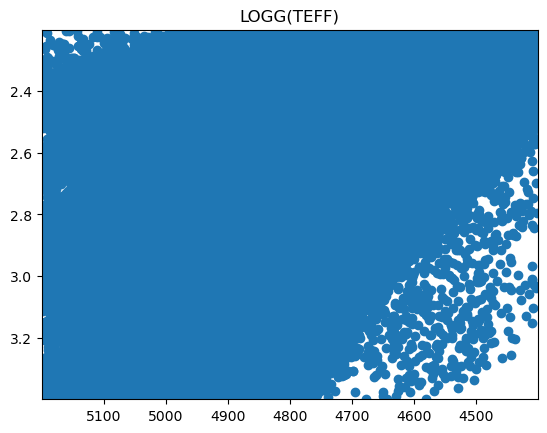

In [27]:
import numpy as np
import matplotlib.pyplot as plt
x = big['TEFF']
y = big['LOGG']
plt.scatter(x,y)
plt.xlim(max(x), min(x))
plt.ylim(max(y), min(y))
plt.title('LOGG(TEFF)')

Ok tenim moltes dades

In [30]:
filtered_big = big[['TEFF','LOGG', 'C_FE', 'CI_FE', 'N_FE', 'O_FE', 'NA_FE', 'MG_FE', 'AL_FE', 'SI_FE', 'S_FE', 'K_FE', 'CA_FE',
                  'TI_FE', 'V_FE', 'CR_FE', 'MN_FE', 'FE_H', 'CO_FE', 'NI_FE', 'CE_FE' ]].copy()
filtered_big = filtered_big.dropna()
filtered_big = filtered_big.apply(pd.to_numeric, errors='coerce')

In [32]:
# Predict the model
pred = model.predict(filtered_big)

In [36]:
pred = pred.tolist()

In [37]:
filtered_big['Predicted_Ages'] = pred

Text(0.5, 1.0, '[Fe/H](isocronic age)')

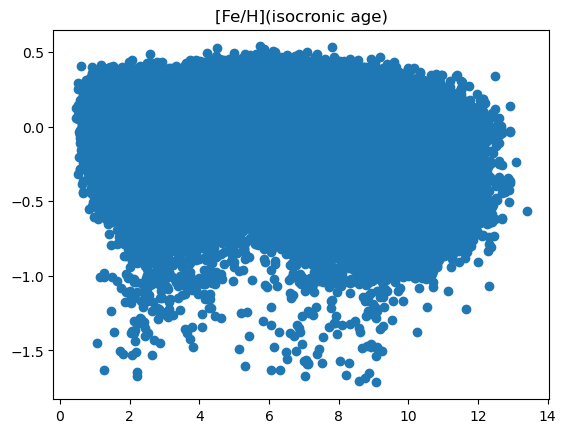

In [38]:
x = filtered_big['Predicted_Ages']
y = filtered_big['FE_H']
plt.scatter(x,y)
plt.title('[Fe/H](isocronic age)')